In [2]:
import pandas as pd
df=pd.read_csv("очищенные_данные_дота1.csv",encoding='utf-8', sep=';', skipinitialspace=True)
df = df.dropna(axis=1, how='all')
df['Восприятие рейтинга'] = df['Мой возможный птс намного больше, чем мой актуальный'] + df['MMR - это всего лишь цифра, она не показывает реальный скилл игрока']
df.head()

,Отметка времени,Id,Пол,Возраст,Максимальный рейтинг в Доте,Рейтинг в доте на данный момент,Количество часов в игре (хотя бы примерное),Какое количество игр в среднем ты играешь в неделю?,"У меня ухудшается настроение, если я долго не играю в Доту 2",Почти все свое свободное время я трачу на Доту 2,...,"У меня часто пропадает желание играть, когда мои тиммейты играют плохо","MMR - это всего лишь цифра, она не показывает реальный скилл игрока",Количество времени в игре,Эмоциональная зависимость,Негативные последствия,Нацеленность на результат,Отсутствие стрессоустойчивости,Макс-реальный,Внешняя атрибуция,Восприятие рейтинга
0,2021/11/08 1:10:08 PM GMT+3,2,М,21,980,960,2808,8,1,2,...,3,5,5,2,4,11,7,20,7,10
1,2021/11/08 1:11:03 PM GMT+3,4,М,19,2370,2130,4500,25,3,4,...,5,5,10,8,8,19,8,240,12,8
2,2021/11/08 1:11:32 PM GMT+3,5,М,15,2700,2400,700,25,1,3,...,2,3,8,2,3,16,8,300,9,8
3,2021/11/08 1:11:36 PM GMT+3,6,М,17,4360,4320,2600,25,4,4,...,4,1,12,9,8,20,8,40,9,4
4,2021/11/08 1:12:00 PM GMT+3,7,М,22,3000,2100,3700,8,1,2,...,3,2,7,5,8,16,9,900,10,6


In [3]:
from scipy.stats import kstest, norm #описательные до выбросов
from scipy.stats import anderson
df_s = df[['Внешняя атрибуция','Восприятие рейтинга']]
mean = df_s.mean()
std = df_s.std()
desc = df_s.describe().round(3)
desc.loc['mode'] = df_s.mode().iloc[0]
desc.loc['skewness'] = df_s.skew().round(3)
desc.loc['kurtosis'] = df_s.kurtosis().round(3)
desc.loc['ks_stat'] = df_s.apply(lambda x: kstest(x, norm.cdf, args=(mean[x.name], std[x.name])).statistic).round(3)
desc.loc['ks_p'] = df_s.apply(lambda x: kstest(x, norm.cdf, args=(mean[x.name], std[x.name])).pvalue).round(3)
desc.loc['anderson_stat'] = df_s.apply(lambda x: round(anderson(x).statistic, 3))
desc

,Внешняя атрибуция,Восприятие рейтинга
count,7448.000,7448.000
mean,8.820,6.124
std,2.540,2.043
min,3.000,2.000
25%,7.000,5.000
50%,9.000,6.000
75%,11.000,8.000
max,15.000,10.000
mode,9.000,6.000
skewness,-0.073,0.008


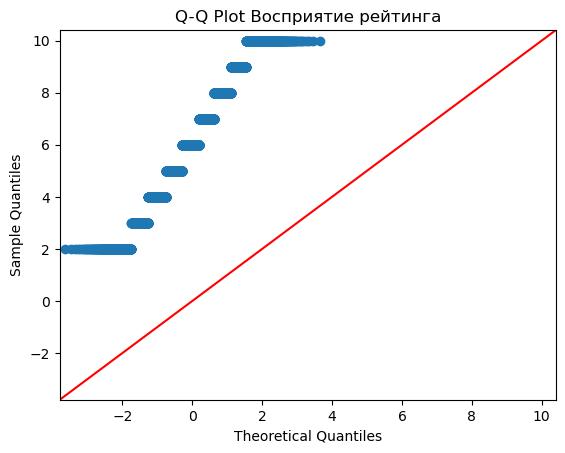

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(df['Восприятие рейтинга'], line='45')
plt.title("Q-Q Plot Восприятие рейтинга")
plt.show()

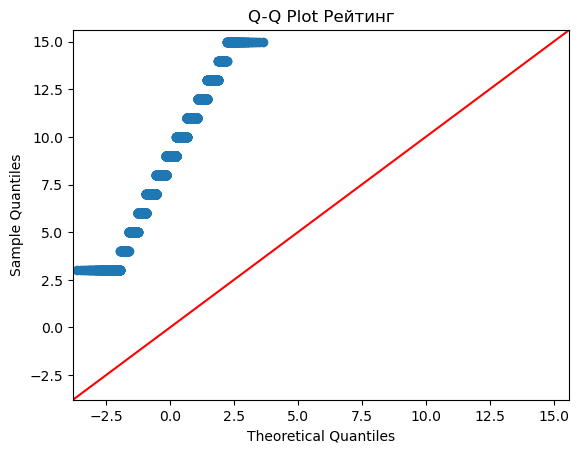

In [5]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(df['Внешняя атрибуция'], line='45')
plt.title("Q-Q Plot Рейтинг")
plt.show()

(array([ 304.,  471.,  914., 1187.,    0., 1445., 1136.,  999.,  537.,
         455.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

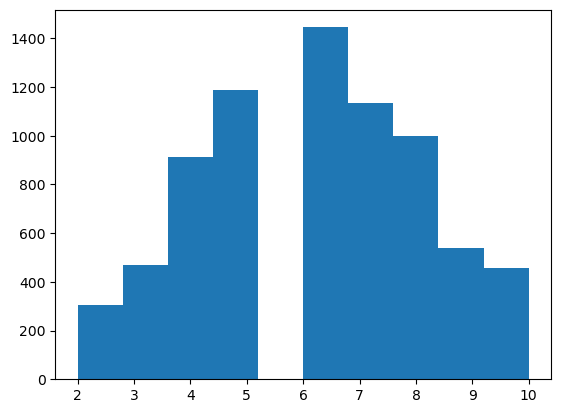

In [8]:
import matplotlib.pyplot as plt
plt.hist(df["Восприятие рейтинга"])

(array([ 391.,  375.,  547.,  898., 1057., 2265.,  866.,  508.,  322.,
         219.]),
 array([ 3. ,  4.2,  5.4,  6.6,  7.8,  9. , 10.2, 11.4, 12.6, 13.8, 15. ]),
 <BarContainer object of 10 artists>)

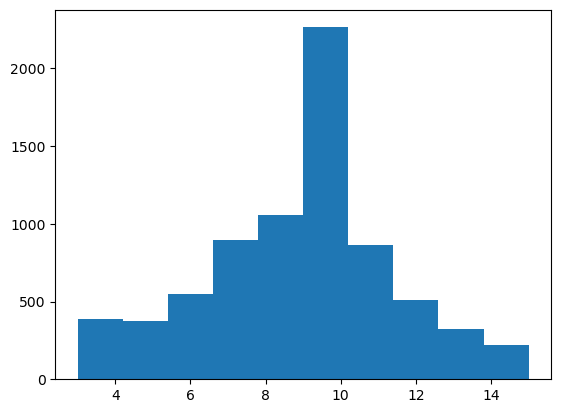

In [9]:
plt.hist(df["Внешняя атрибуция"])

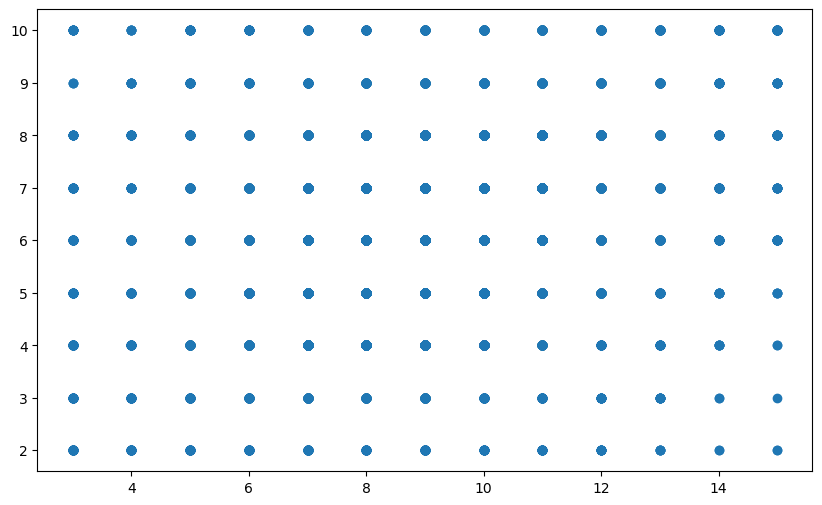

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Внешняя атрибуция"], df["Восприятие рейтинга"])

C:\Users\Аннюта\AppData\Local\Temp\ipykernel_3008\1010999130.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Внешняя атрибуция'])


<Axes: xlabel='Внешняя атрибуция', ylabel='Density'>

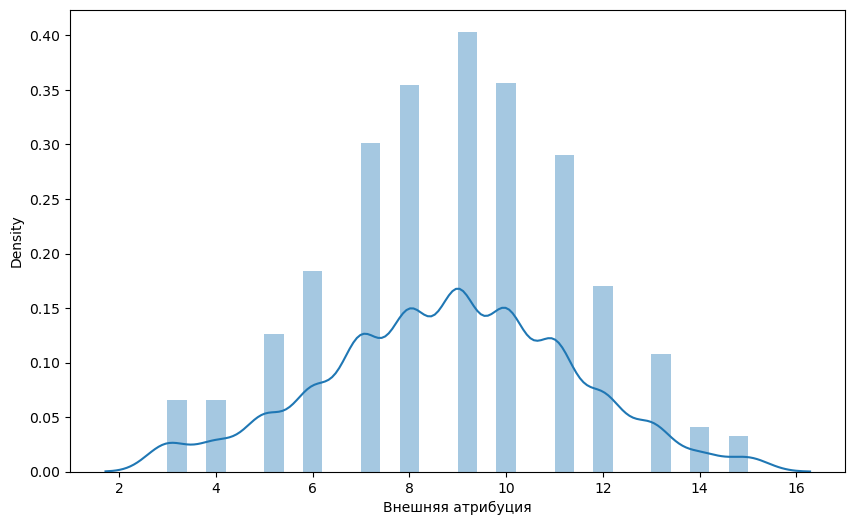

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.distplot(df['Внешняя атрибуция'])

C:\Users\Аннюта\AppData\Local\Temp\ipykernel_19672\3537956211.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['Восприятие рейтинга'])


<Axes: xlabel='Восприятие рейтинга', ylabel='Density'>

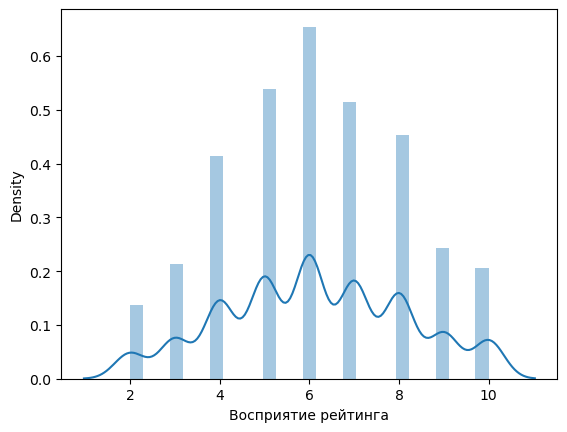

In [20]:
sns.distplot(df_clean['Восприятие рейтинга'])

In [14]:
correlation=df[['Восприятие рейтинга', 'Внешняя атрибуция']].corr(method='spearman')
correlation

,Восприятие рейтинга,Внешняя атрибуция
Восприятие рейтинга,1.000000,0.273006
Внешняя атрибуция,0.273006,1.000000


In [16]:
from scipy.stats import spearmanr
import pandas as pd
cols = ['Восприятие рейтинга', 'Внешняя атрибуция']
data = df[cols]

corr, p_values = spearmanr(data)
p_values_df = pd.DataFrame(p_values, columns=cols, index=cols )

p_values_df_rounded = p_values_df.round(4)
print(p_values_df_rounded)

                     Восприятие рейтинга  Внешняя атрибуция
Восприятие рейтинга                  0.0                0.0
Внешняя атрибуция                    0.0                0.0


<Axes: >

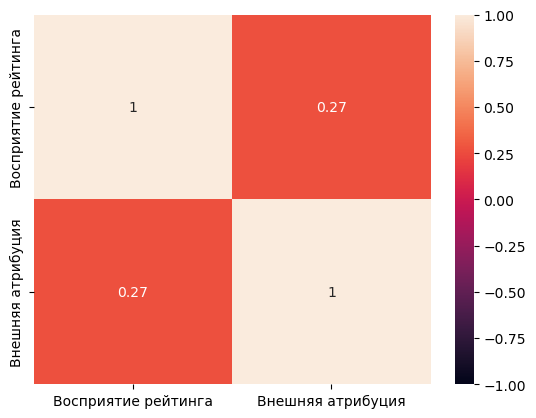

In [17]:
sns.heatmap(correlation, annot=True, vmax=1, vmin=-1)

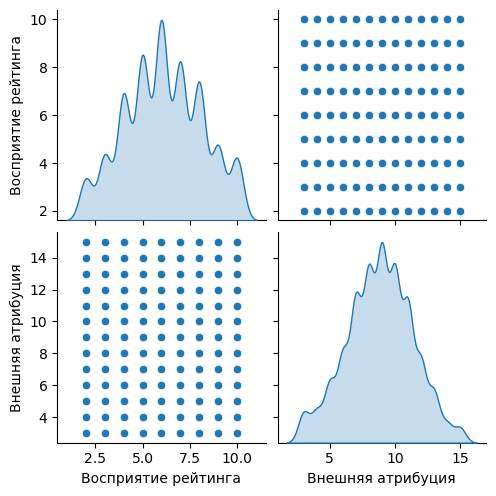

In [19]:
subset = df[["Восприятие рейтинга", "Внешняя атрибуция"]]
sns.pairplot(subset, diag_kind='kde')

In [20]:
from scipy import stats
X=df['Внешняя атрибуция']
y=df['Восприятие рейтинга']
res=stats.linregress(X,y)
res

LinregressResult(slope=0.2287700481543746, intercept=4.106008737491331, rvalue=0.2844731185604933, pvalue=1.1666471171374979e-138, stderr=0.008934533898269233, intercept_stderr=0.08200145440460697)

In [26]:
r_sq=res.rvalue**2
r_sq

0.018470140089845002

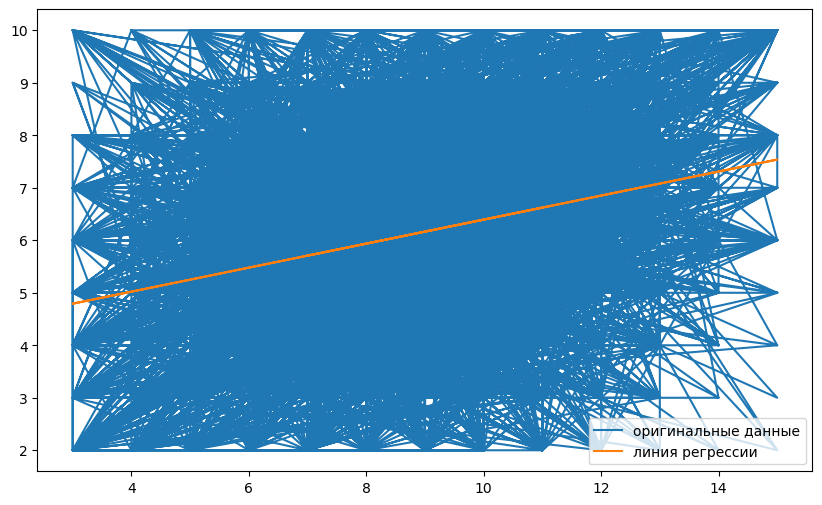

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(X,y, label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, label='линия регрессии')
plt.legend()
plt.show()